# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [7]:
df_raw=pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\5th sem\AIML\smoking.csv")

In [8]:
df_raw.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [9]:
df_raw.shape

(1691, 13)

## Data processing

###### Drop unnecessary Columns and Treat missing values

In [10]:
smoking=df_raw.drop('Unnamed: 0',axis=1)

In [11]:
smoking.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [12]:
smoking.shape

(1691, 12)

In [13]:
smoking.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

In [14]:
print(smoking.isnull().sum())

gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64


In [15]:
# Select rows where `smoke` is `'No'`
no_smoke_rows = smoking.loc[smoking['smoke'] == 'No']

# Set `amt_weekends` and `amt_weekdays` to `0` for those rows
smoking.loc[no_smoke_rows.index, ['amt_weekends', 'amt_weekdays']] = 0

In [16]:
# Replace NaN values in the `type` column with 'Non-Smoker' for non-smokers
no_smoke_rows = smoking.loc[smoking['smoke'] == 'No']
smoking.loc[no_smoke_rows.index, 'type'] = 'Non-Smoker'

In [17]:
print(smoking.isnull().sum())

gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64


## EDA(Exploratory Data Analysis)

In [18]:
#summary statistics
smoking.describe()

,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,1691.000000
mean,49.836192,4.085748,3.423418
std,18.736851,8.643517,7.568341
min,16.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000
50%,48.000000,0.000000,0.000000
75%,65.500000,0.000000,0.000000
max,97.000000,60.000000,55.000000


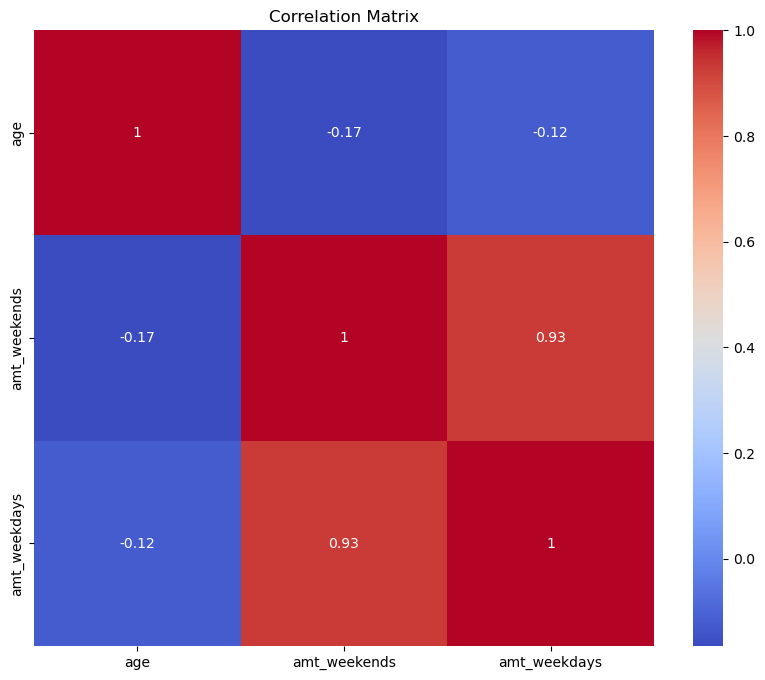

In [19]:
# Correlation matrix
corr_matrix = smoking.corr(numeric_only=True)  # Specify numeric_only=True
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

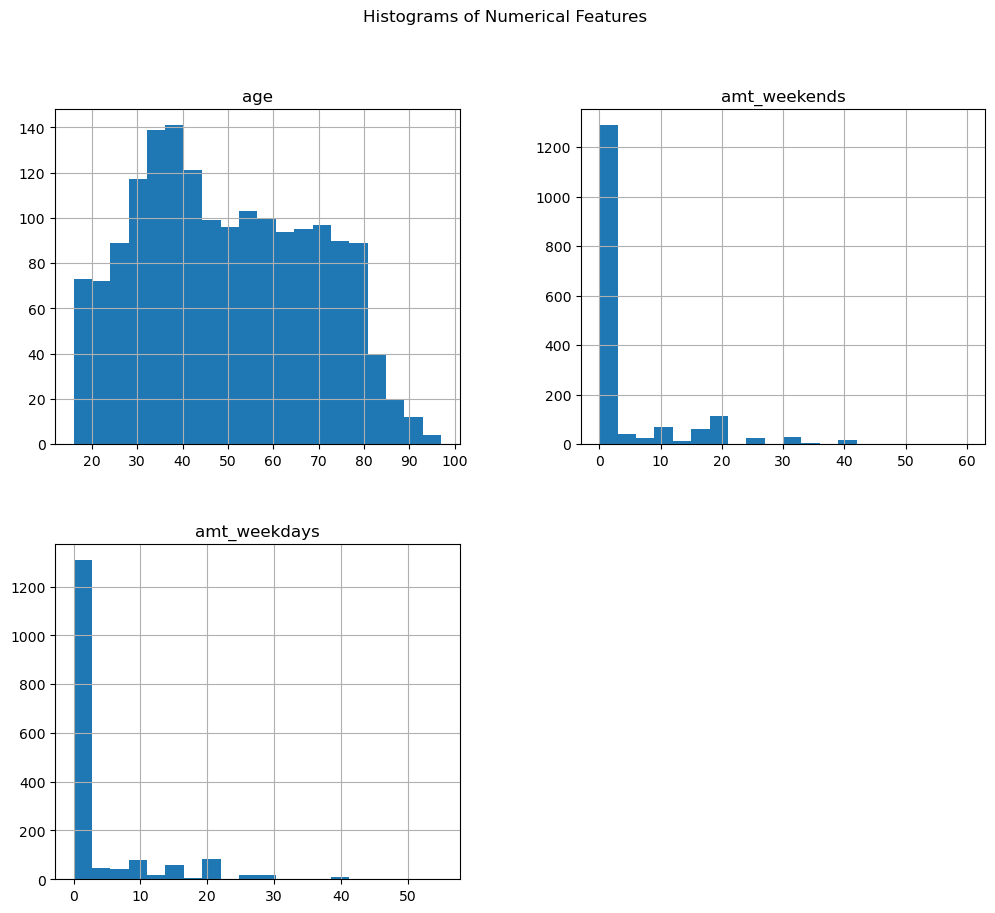

In [20]:
# Histograms of numerical features
numerical_cols = smoking.select_dtypes(include=np.number).columns
smoking[numerical_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

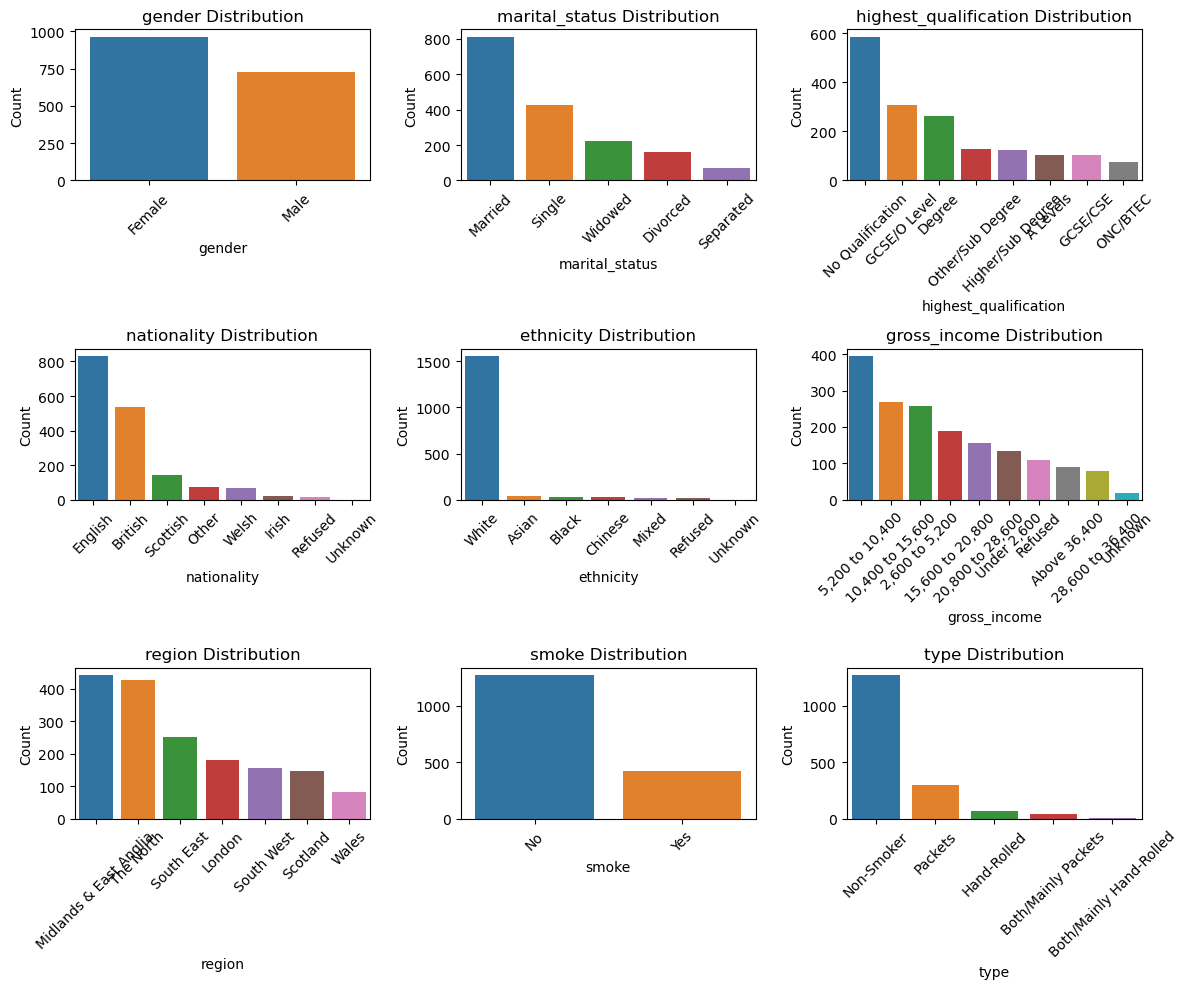

In [21]:
# Count plot of categorical features
categorical_cols = smoking.select_dtypes(include='object').columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=smoking, x=col, order=smoking[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


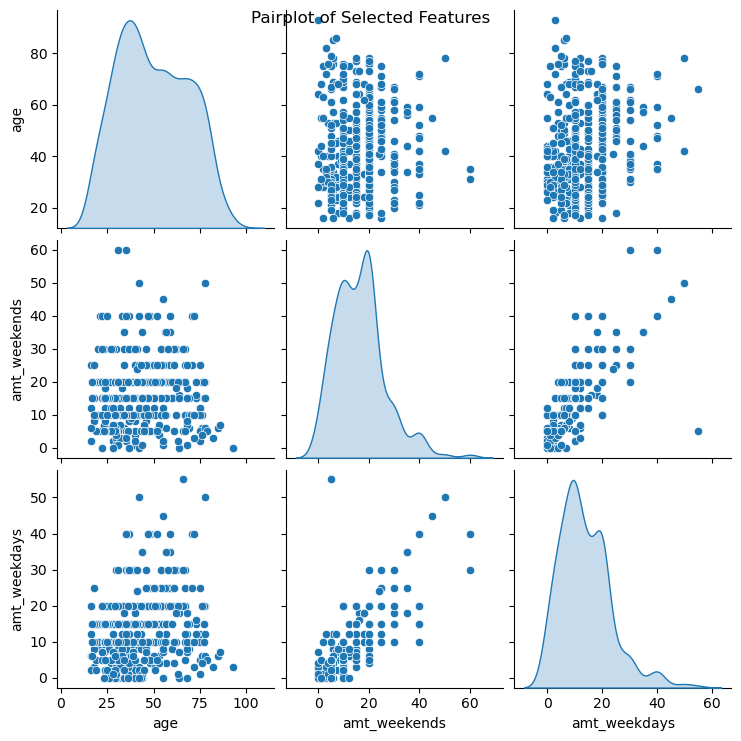

In [22]:
# Pairplot for selected features
selected_features = ['age', 'gross_income', 'amt_weekends', 'amt_weekdays']
sns.pairplot(data=df_raw[selected_features], diag_kind='kde')
plt.suptitle("Pairplot of Selected Features")
plt.show()

## Linear regression model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting the features and target variable
features = ['age', 'amt_weekdays']
target = 'amt_weekends'

# Splitting the data into training and testing sets
X = smoking[features]
y = smoking[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Printing the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 9.70699656587689
Coefficients: [-0.02540132  1.04030077]
Intercept: 1.7923616997908631


In [24]:
#ŷ = b0 + (b1 * X1) + (b2 * X2) + ... + (bn * Xn)

new_age = 37
new_amt_weekdays = 15


coefficient_age = -0.02540132
coefficient_amt_weekdays = 1.04030077
intercept = 1.7923616997908631

# Calculating the predicted 'amt_weekends' using the coefficients and intercept
predicted_amt_weekends = intercept + (coefficient_age * new_age) + (coefficient_amt_weekdays * new_amt_weekdays)

# Print the predicted 'amt_weekends'
print(f"Predicted amt_weekends: {predicted_amt_weekends}")

Predicted amt_weekends: 16.45702440979086


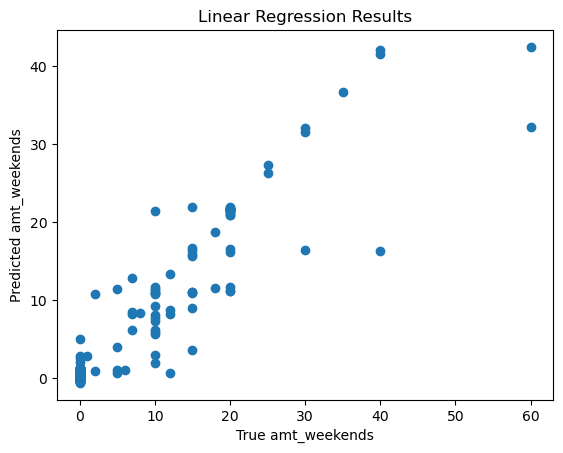

In [20]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('True amt_weekends')
plt.ylabel('Predicted amt_weekends')
plt.title('Linear Regression Results')
plt.show()

## Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Discretize `amt_weekends` into a binary target variable (e.g., High and Low)
threshold = smoking['amt_weekends'].median()
smoking['amt_weekends_category'] = np.where(smoking['amt_weekends'] > threshold, 'High', 'Low')

# Split the data into features (X) and the binary target (y)
X = smoking[['age', 'amt_weekdays']]
y = smoking['amt_weekends_category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        High       0.96      0.92      0.94        77
         Low       0.98      0.99      0.98       262

    accuracy                           0.97       339
   macro avg       0.97      0.96      0.96       339
weighted avg       0.97      0.97      0.97       339



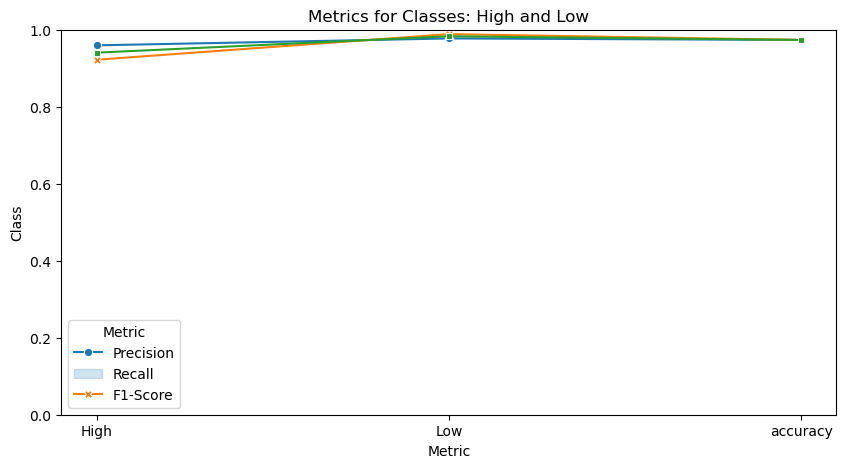

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Converting the classification report to a DataFrame
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

# Exclude 'macro avg' and 'weighted avg'
report_df = report_df.drop(['macro avg', 'weighted avg'])

# Plot precision, recall, and f1-score using a simple line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=report_df[['precision', 'recall', 'f1-score']], markers=True, dashes=False)

# Customize the plot
plt.title('Metrics for Classes: High and Low')
plt.xlabel('Metric')
plt.ylabel('Class')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.legend(title='Metric', labels=['Precision', 'Recall', 'F1-Score'])

# Display the plot
plt.show()